# FITRI EKA C / 1301164537

In [1]:
import csv
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [2]:
def ReadData ():
    with open ('Dataset.csv') as csv_file : 
        kolom = csv.reader(csv_file, delimiter= ',')
        next(kolom)
        Datatest = []
        for row in kolom :
            Datatest.append([float(row[0]),float(row[1]) ])
        return np.array(Datatest)

In [3]:
Data = ReadData()

In [4]:
Data

array([[10.35 ,  9.768],
       [10.098,  9.988],
       [ 9.73 ,  9.91 ],
       ...,
       [13.636,  5.218],
       [14.41 ,  4.656],
       [14.02 ,  5.614]])

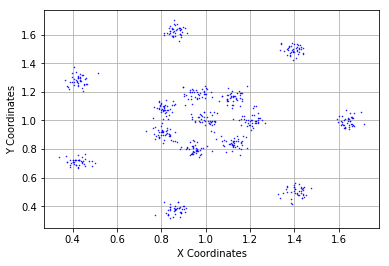

In [5]:
#plot data rentang 0 - 2
with open('Dataset.csv', 'r') as f:
    reader = csv.reader(f)
    dataTrain = [[float(r[0])/10, float(r[1])/10, -1] for r in reader]
point = plt.plot([x[0] for x in dataTrain], [x[1] for x in dataTrain], 'b.')
plt.setp(point, markersize=1)
plt.xlabel("X Coordinates")
plt.ylabel("Y Coordinates")
# plt.axis([0, 20, 0, 20])
plt.grid()

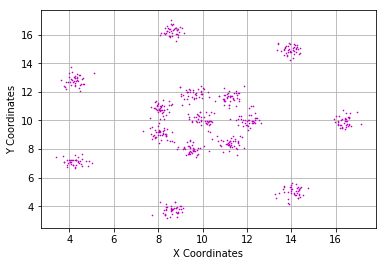

In [6]:
#plot data asli
with open('Dataset.csv', 'r') as f:
    reader = csv.reader(f)
    dataTrain = [[float(r[0]), float(r[1]), -1] for r in reader]
point = plt.plot([x[0] for x in dataTrain], [x[1] for x in dataTrain], 'mx')
plt.setp(point, markersize=1)
plt.xlabel("X Coordinates")
plt.ylabel("Y Coordinates")
# plt.axis([0, 20, 0, 20])
plt.grid()

In [7]:
#update nilai learning rate
def UpdateLearning (ln,i) :
    Tn = 2
    hasil = ln * math.exp (- i / Tn)
    return hasil

In [8]:
#update nilai radius 
def Update_radius (rd , i) :
    Tr = 2
    hasil = rd * math.exp (- i / Tr)
    return hasil

In [9]:
#rumus eucledian
def Rumus_Eus(a, b):
    hasil = math.sqrt(np.sum((a - b)**2)) 
    return hasil

In [10]:
def hitung_kiri (x,y,z):
    hasil = 1 - (x*y/z)
    return hasil

In [11]:
def nilai_range (x,y): 
    hasil = np.round(x * y)
    return hasil

In [12]:
kolom = 4
baris = 3
dim = 2
w1 = []
w2 =[]
kotak = kolom + baris
w1 = [np.random.uniform(0,1) for p in range(0,12)]
w2 = [np.random.uniform(0,1) for p in range(0,12)]
random_gabungan = (list(zip(w1,w2)))

In [13]:
jadi_satu = np.array(random_gabungan)
#jadi_satu = jadi_satu.append([float(w1[0]),float(w2[1]) ])
print(jadi_satu)

[[0.2129239  0.75559136]
 [0.31551898 0.73179794]
 [0.02464566 0.21969205]
 [0.355098   0.54491487]
 [0.6167305  0.42554011]
 [0.25473867 0.90362586]
 [0.38147285 0.02871025]
 [0.73061571 0.15141554]
 [0.57558013 0.54859928]
 [0.37193848 0.96682125]
 [0.02004475 0.97358783]
 [0.18591517 0.68126587]]


In [14]:
random_n = np.random.uniform(0, 1, (kolom, baris, 2))
print(random_n)

[[[0.25094868 0.8160259 ]
  [0.92456606 0.51380775]
  [0.88279651 0.93364713]]

 [[0.62178925 0.9456187 ]
  [0.53568068 0.48161399]
  [0.28926071 0.90086876]]

 [[0.67208156 0.39819983]
  [0.8361255  0.62989973]
  [0.2615247  0.5150464 ]]

 [[0.48191529 0.11595605]
  [0.0457438  0.76371402]
  [0.18553991 0.50231451]]]


In [15]:
#hitung nilai SOM
ln = 0.1
rd = 2
ak = 1.0 
k = []
iterasi = 20
for m in range(iterasi):
    jarak_kiri = hitung_kiri(m,ak,iterasi)
    rentang = nilai_range(jarak_kiri,kotak)
    learningrate = UpdateLearning (ln,m)
    radius = Update_radius (rd, m)
    #nilai_bmu= Best_Neoron(Data, random_n)
    ##print(nilai_bmu)
    for z in Data : 
        nilai_bmu = np.array([0, 0])
        jarak_min = Rumus_Eus(random_n[0][0], z)
        for x in range(kolom):
            for y in range(baris):
                jarak = Rumus_Eus(random_n[x][y], z)
                if(jarak < jarak_min):
                    jarak_min = jarak
                    nilai_bmu = np.array([x, y])
        for x in range(kolom):
            for y in range(baris):
                if(Rumus_Eus(np.array([nilai_bmu[0], nilai_bmu[1]]), np.array([x, y])) <= 2):
                    random_n[x][y] = random_n[x][y] + learningrate * np.exp(-(Rumus_Eus(np.array([x, y]), nilai_bmu)**2)
                                                                        /(2*(radius**2))) * (z - random_n[x][y])

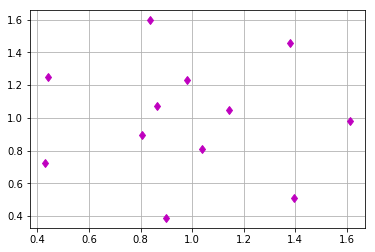

In [16]:
# plot data random neuron 
nouronupdate = np.reshape(random_n, (kolom * baris, 2)).T
plt.plot(nouronupdate[0] / 10, nouronupdate[1]/10, 'md')
plt.grid()

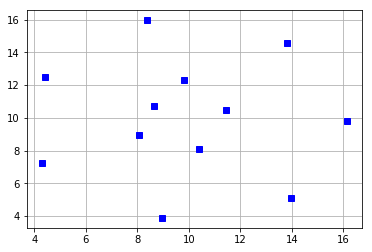

In [17]:
#plot data randm neuron asli
nouronupdate = np.reshape(random_n, (kolom * baris, 2)).T
plt.plot(nouronupdate[0], nouronupdate[1], 'bs')
plt.grid()

In [18]:
# Clustering
nilaiclus = []
for i in Data:
    # Find the closest vector
    nilai_bmu = np.array([0, 0])
    jarak_min = Rumus_Eus(random_n[0][0], i)
    for x in range(kolom):
        for y in range(baris):
            jarak = Rumus_Eus(random_n[x][y], i)
            if(jarak < jarak_min):
                jarak_min = jarak
                nilai_bmu = np.array([x, y])
    nilaiclus.append([i, nilai_bmu[0]+nilai_bmu[1]*kolom])

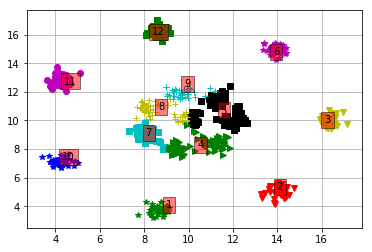

In [19]:
# Plot the cluster
def show(nilaiclus, random_n, kolom, baris):
    cl = np.zeros(kolom*baris)
    i=1
    for v in np.reshape(random_n, (kolom*baris, 2)):
        plt.text(v[0], v[1], i, bbox={'facecolor':'red','alpha':0.5, 'pad':3})
        i+=1
    for p in nilaiclus:
        cl[p[1]] += 1
        if(p[1] == 0):
            plt.plot(p[0][0], p[0][1], 'g*')
        elif(p[1] == 1):
            plt.plot(p[0][0], p[0][1], 'g>')
        elif(p[1] == 2):
            plt.plot(p[0][0], p[0][1], 'cs')
        elif(p[1] == 3):
            plt.plot(p[0][0], p[0][1], 'b*')
        elif(p[1] == 4):
            plt.plot(p[0][0], p[0][1], 'rv')
        elif(p[1] == 5):
            plt.plot(p[0][0], p[0][1], 'ks')
        elif(p[1] == 6):
            plt.plot(p[0][0], p[0][1], 'y+')
        elif(p[1] == 7):
            plt.plot(p[0][0], p[0][1], 'mo')
        elif(p[1] == 8):
            plt.plot(p[0][0], p[0][1], 'yv')
        elif(p[1] == 9):
            plt.plot(p[0][0], p[0][1], 'm*')
        elif(p[1] == 10):
            plt.plot(p[0][0], p[0][1], 'c+')
        elif(p[1] == 11):
            plt.plot(p[0][0], p[0][1], 'gs')
        elif(p[1] == 12):
            plt.plot(p[0][0], p[0][1], 'k<')
        elif(p[1] == 13):
            plt.plot(p[0][0], p[0][1], 'r>')
        elif(p[1] == 14):
            plt.plot(p[0][0], p[0][1], 'm+')
        else:
            plt.plot(p[0][0], p[0][1], 'b*')
show(nilaiclus, random_n, kolom, baris)
plt.grid()
